In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.contingency import odds_ratio

Odds ratios per diferents variables, comparant sempre les cohorts "Nirse" i "No nirse". Només a Catalunya

## Tots junts (seasonals i catch-ups)

In [ ]:
or_all = []
low_ci_all = []
high_ci_all = []

#Funció per calcular odds ratios i confidence intervals
def or_and_ci(table):
  res = odds_ratio(table)
  or_value = res.statistic
  ci=res.confidence_interval(confidence_level=0.95)

  low_value=ci.low
  high_value=ci.high

  or_all.append(or_value)
  low_ci_all.append(low_value)
  high_ci_all.append(high_value)

# VRS +
or_and_ci([[30, 8], [908, 83]])

# Admitted to hospital
or_and_ci([[22, 6], [908, 83]])

# PICU admissions
or_and_ci([[6, 1], [908, 83]])

# Final diagnosis low tract (including inespecificities)
or_and_ci([[76, 14], [908, 83]])

# Final diagnosis high tract (including inespecificities)
or_and_ci([[180, 17], [908, 83]])

# Final diagnosis low tract (only VRS specified)
or_and_ci([[24, 7], [908, 83]])

# Final diagnosis high tract (only VRS specified)
or_and_ci([[10, 0], [908, 83]])

In [ ]:
# DataFrame with the results
results_all=pd.DataFrame({
    'OR': or_all,
    'Low_CI': low_ci_all,
    'High_CI': high_ci_all
})

inf_mask=results_all.isin([np.inf,-np.inf]).any(axis=1)
results_all.loc[inf_mask, :] = np.nan

results_all

,OR,Low_CI,High_CI
0,0.343315,0.147624,0.895216
1,0.335711,0.127334,1.040768
2,0.548880,0.065388,25.528109
3,0.496630,0.264066,0.993501
4,0.967894,0.553253,1.783469
5,0.313952,0.126360,0.889198
6,NaN,NaN,NaN


In [ ]:
results_all_invertido = results_all.iloc[::-1].reset_index(drop=True)
results_all_invertido

,OR,Low_CI,High_CI
0,NaN,NaN,NaN
1,0.313952,0.126360,0.889198
2,0.967894,0.553253,1.783469
3,0.496630,0.264066,0.993501
4,0.548880,0.065388,25.528109
5,0.335711,0.127334,1.040768
6,0.343315,0.147624,0.895216


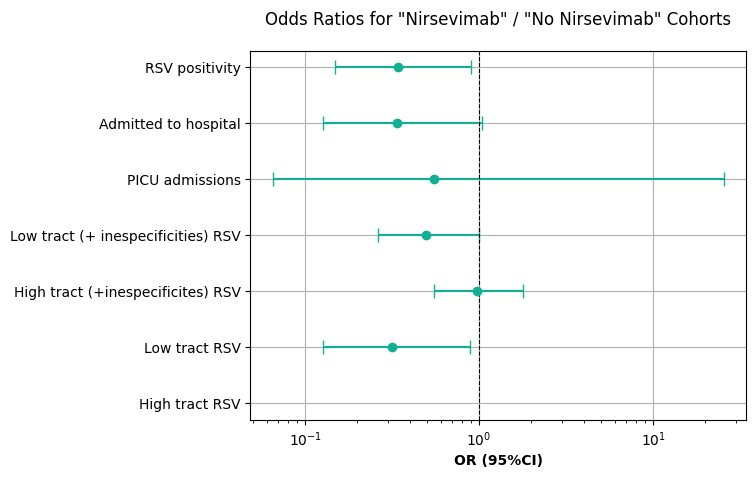

In [ ]:
# Invertir DataFrame
results_all_invertido = results_all.iloc[::-1].reset_index(drop=True)
y_labels = ['RSV positivity', 'Admitted to hospital', 'PICU admissions', 'Low tract (+ inespecificities) RSV', 'High tract (+inespecificites) RSV', 'Low tract RSV', 'High tract RSV'][::-1]

# OR log representation
plt.errorbar(x=results_all_invertido['OR'],
             y=y_labels,
             xerr=[results_all_invertido['OR'] - results_all_invertido['Low_CI'],
                   results_all_invertido['High_CI'] - results_all_invertido['OR']],
             color='#10B092', capsize=5, linestyle='None', linewidth=1.5,
             marker="o", markersize=6, mfc="#10B092", mec="#10B092")

plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('OR (95%CI)', fontsize=10, weight='bold')
plt.xscale('log')
plt.title('Odds Ratios for "Nirsevimab" / "No Nirsevimab" Cohorts', y=1.05)
plt.grid(True)
plt.show()


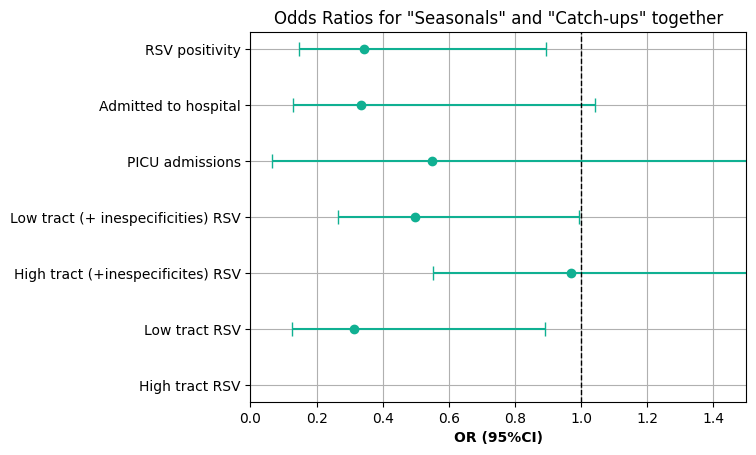

In [ ]:
# Invertir DataFrame
results_all_invertido = results_all.iloc[::-1].reset_index(drop=True)
y_labels = ['RSV positivity', 'Admitted to hospital', 'PICU admissions', 'Low tract (+ inespecificities) RSV', 'High tract (+inespecificites) RSV', 'Low tract RSV', 'High tract RSV'][::-1]

# OR representation
plt.errorbar(x=results_all_invertido['OR'],
             y=y_labels,
             xerr=[results_all_invertido['OR'] - results_all_invertido['Low_CI'],
                   results_all_invertido['High_CI'] - results_all_invertido['OR']],
             color='#10B092', capsize=5, linestyle='None', linewidth=1.5,
             marker="o", markersize=6, mfc="#10B092", mec="#10B092")

plt.axvline(x=1, linewidth=1, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('OR (95%CI)', fontsize=10, weight='bold')
plt.xlim((0.0, 1.5))
#plt.xscale('log')
plt.title('Odds Ratios for "Seasonals" and "Catch-ups" together')
plt.grid(True)
plt.show()

## Seasonals

In [ ]:
or_seasonals = []
low_ci_seasonals = []
high_ci_seasonals = []

#Funció per calcular odds ratios i confidence intervals
def or_and_ci(table):
  res = odds_ratio(table)
  or_value = res.statistic
  ci=res.confidence_interval(confidence_level=0.95)

  low_value=ci.low
  high_value=ci.high

  or_seasonals.append(or_value)
  low_ci_seasonals.append(low_value)
  high_ci_seasonals.append(high_value)

# VRS +
or_and_ci([[9, 2], [188, 18]])

# Admitted to hospital
or_and_ci([[12, 2], [188, 18]])

# PICU admissions
or_and_ci([[5, 0], [188, 18]])

# Final diagnosis low tract (including inespecificities)
or_and_ci([[13, 3], [188, 18]])

# Final diagnosis high tract (including inespecificities)
or_and_ci([[28, 3], [188, 18]])

# Final diagnosis low tract (only VRS specified)
or_and_ci([[8, 2], [188, 18]])

# Final diagnosis high tract (only VRS specified)
or_and_ci([[3, 0], [188, 18]])

In [ ]:
# DataFrame with the results
results_seasonals=pd.DataFrame({
    'OR': or_seasonals,
    'Low_CI': low_ci_seasonals,
    'High_CI': high_ci_seasonals
})

inf_mask=results_seasonals.isin([np.inf,-np.inf]).any(axis=1)
results_seasonals.loc[inf_mask, :] = np.nan

results_seasonals

,OR,Low_CI,High_CI
0,0.433113,0.080255,4.420950
1,0.576229,0.113783,5.701050
2,NaN,NaN,NaN
3,0.417104,0.100546,2.490770
4,0.894056,0.237637,5.039397
5,0.385383,0.069141,3.994083
6,NaN,NaN,NaN


In [ ]:
results_seasonals_invertido = results_seasonals.iloc[::-1].reset_index(drop=True)
results_seasonals_invertido

,OR,Low_CI,High_CI
0,NaN,NaN,NaN
1,0.385383,0.069141,3.994083
2,0.894056,0.237637,5.039397
3,0.417104,0.100546,2.490770
4,NaN,NaN,NaN
5,0.576229,0.113783,5.701050
6,0.433113,0.080255,4.420950


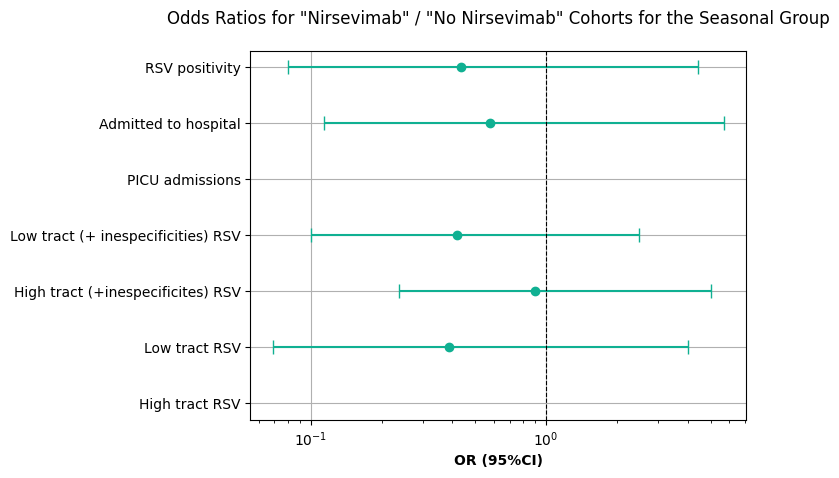

In [ ]:
# Invertir DataFrame
results_seasonals_invertido = results_seasonals.iloc[::-1].reset_index(drop=True)
y_labels = ['RSV positivity', 'Admitted to hospital', 'PICU admissions', 'Low tract (+ inespecificities) RSV', 'High tract (+inespecificites) RSV', 'Low tract RSV', 'High tract RSV'][::-1]

# OR log representation
plt.errorbar(x=results_seasonals_invertido['OR'],
             y=y_labels,
             xerr=[results_seasonals_invertido['OR'] - results_seasonals_invertido['Low_CI'],
                   results_seasonals_invertido['High_CI'] - results_seasonals_invertido['OR']],
             color='#10B092', capsize=5, linestyle='None', linewidth=1.5,
             marker="o", markersize=6, mfc="#10B092", mec="#10B092")

plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('OR (95%CI)', fontsize=10, weight='bold')
plt.xscale('log')
plt.title('Odds Ratios for "Nirsevimab" / "No Nirsevimab" Cohorts for the Seasonal Group', y=1.05)
plt.grid(True)
plt.show()


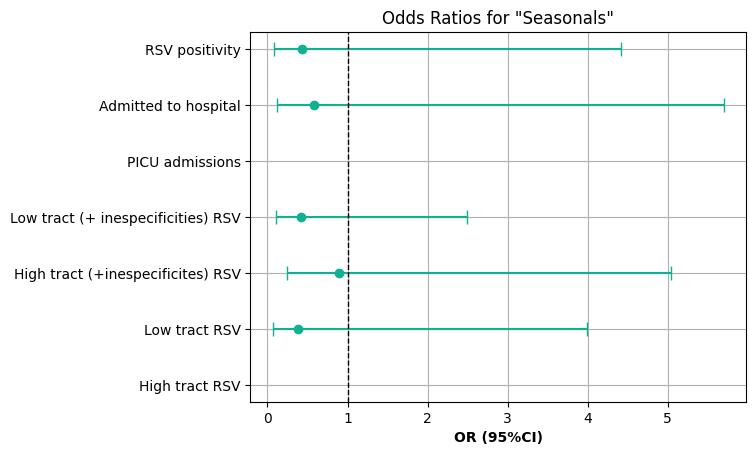

In [ ]:
# Invertir DataFrame
results_seasonals_invertido = results_seasonals.iloc[::-1].reset_index(drop=True)
y_labels = ['RSV positivity', 'Admitted to hospital', 'PICU admissions', 'Low tract (+ inespecificities) RSV', 'High tract (+inespecificites) RSV', 'Low tract RSV', 'High tract RSV'][::-1]

# OR representation
plt.errorbar(x=results_seasonals_invertido['OR'],
             y=y_labels,
             xerr=[results_seasonals_invertido['OR'] - results_seasonals_invertido['Low_CI'],
                   results_seasonals_invertido['High_CI'] - results_seasonals_invertido['OR']],
             color='#10B092', capsize=5, linestyle='None', linewidth=1.5,
             marker="o", markersize=6, mfc="#10B092", mec="#10B092")

plt.axvline(x=1, linewidth=1, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('OR (95%CI)', fontsize=10, weight='bold')
#plt.xlim((0.0, 1.5))
#plt.xscale('log')
plt.title('Odds Ratios for "Seasonals"')
plt.grid(True)
plt.show()

## Catch-ups

In [ ]:
or_catchups = []
low_ci_catchups = []
high_ci_catchups = []

#Funció per calcular odds ratios i confidence intervals
def or_and_ci(table):
  res = odds_ratio(table)
  or_value = res.statistic
  ci=res.confidence_interval(confidence_level=0.95)

  low_value=ci.low
  high_value=ci.high

  or_catchups.append(or_value)
  low_ci_catchups.append(low_value)
  high_ci_catchups.append(high_value)

# VRS +
or_and_ci([[21, 6], [720, 65]])

# Admitted to hospital
or_and_ci([[10, 4], [720, 65]])

# PICU admissions
or_and_ci([[1, 1], [720, 65]])

# Final diagnosis low tract (including inespecificities)
or_and_ci([[63, 11], [720, 65]])

# Final diagnosis high tract (including inespecificities)
or_and_ci([[152, 14], [720, 65]])

# Final diagnosis low tract (only VRS specified)
or_and_ci([[16, 5], [720, 65]])

# Final diagnosis high tract (only VRS specified)
or_and_ci([[7, 0], [720, 65]])

In [ ]:
# DataFrame with the results
results_catchups=pd.DataFrame({
    'OR': or_catchups,
    'Low_CI': low_ci_catchups,
    'High_CI': high_ci_catchups
})

inf_mask=results_catchups.isin([np.inf,-np.inf]).any(axis=1)
results_catchups.loc[inf_mask, :] = np.nan

results_catchups

,OR,Low_CI,High_CI
0,0.316659,0.118118,0.993407
1,0.226429,0.063076,1.016716
2,0.090906,0.001149,7.194796
3,0.517539,0.254106,1.144071
4,0.980179,0.527278,1.942231
5,0.289597,0.097275,1.043562
6,NaN,NaN,NaN


In [ ]:
results_catchups_invertido = results_catchups.iloc[::-1].reset_index(drop=True)
results_catchups_invertido

,OR,Low_CI,High_CI
0,NaN,NaN,NaN
1,0.289597,0.097275,1.043562
2,0.980179,0.527278,1.942231
3,0.517539,0.254106,1.144071
4,0.090906,0.001149,7.194796
5,0.226429,0.063076,1.016716
6,0.316659,0.118118,0.993407


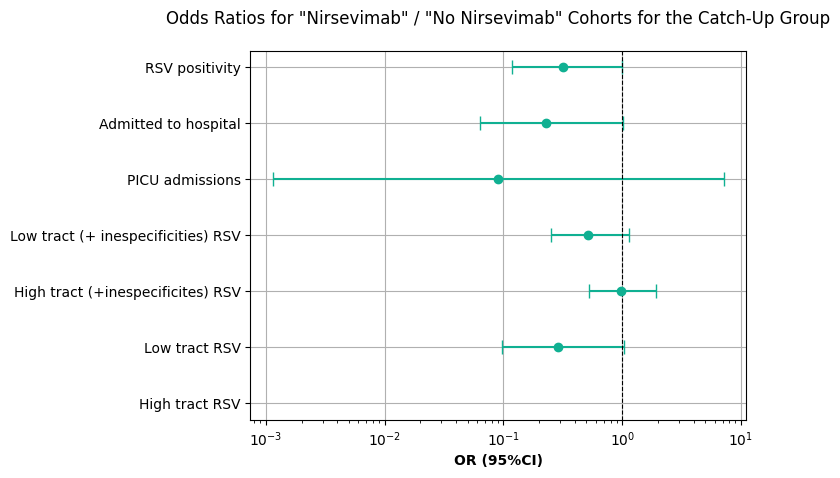

In [ ]:
# Invertir DataFrame
results_catchups_invertido = results_catchups.iloc[::-1].reset_index(drop=True)
y_labels = ['RSV positivity', 'Admitted to hospital', 'PICU admissions', 'Low tract (+ inespecificities) RSV', 'High tract (+inespecificites) RSV', 'Low tract RSV', 'High tract RSV'][::-1]

# OR log representation
plt.errorbar(x=results_catchups_invertido['OR'],
             y=y_labels,
             xerr=[results_catchups_invertido['OR'] - results_catchups_invertido['Low_CI'],
                   results_catchups_invertido['High_CI'] - results_catchups_invertido['OR']],
             color='#10B092', capsize=5, linestyle='None', linewidth=1.5,
             marker="o", markersize=6, mfc="#10B092", mec="#10B092")

plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('OR (95%CI)', fontsize=10, weight='bold')
plt.xscale('log')
plt.title('Odds Ratios for "Nirsevimab" / "No Nirsevimab" Cohorts for the Catch-Up Group', y=1.05)
plt.grid(True)
plt.show()


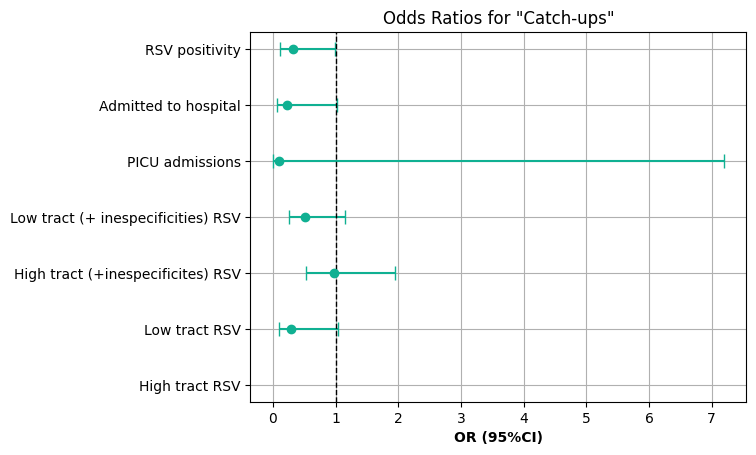

In [ ]:
# Invertir DataFrame
results_catchups_invertido = results_catchups.iloc[::-1].reset_index(drop=True)
y_labels = ['RSV positivity', 'Admitted to hospital', 'PICU admissions', 'Low tract (+ inespecificities) RSV', 'High tract (+inespecificites) RSV', 'Low tract RSV', 'High tract RSV'][::-1]

# OR representation
plt.errorbar(x=results_catchups_invertido['OR'],
             y=y_labels,
             xerr=[results_catchups_invertido['OR'] - results_catchups_invertido['Low_CI'],
                   results_catchups_invertido['High_CI'] - results_catchups_invertido['OR']],
             color='#10B092', capsize=5, linestyle='None', linewidth=1.5,
             marker="o", markersize=6, mfc="#10B092", mec="#10B092")

plt.axvline(x=1, linewidth=1, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('OR (95%CI)', fontsize=10, weight='bold')
#plt.xlim((0.0, 1.5))
#plt.xscale('log')
plt.title('Odds Ratios for "Catch-ups"')
plt.grid(True)
plt.show()